# CS 210 -- Data Management For Data Science 

Final Project, Preliminary Analysis 

Group Members: Nilay Tripathi, Nikhil Munagala, Arnav Borborah, Ajay Anand

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

## Information About The Data Set

Our data set is "Jobs And Salaries In Data Science", which gives information about salaries in careers related to data science (e.g. data scientist, data architect, machine learning engineer, etc.). The data set was obtained from Kaggle and can be found [here](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data). 

Here is a brief summary of the meanings of the columns

- `work_year`: year the data was recorded.
- `job_title`: the specific title of the job.
- `job_category`: specialized category of the job (data science, analyst, machine learning etc.). More descriptive.
- `salary_currency`: currency the salary is reported in
- `salary`: annual salary, in the currency specified by the `salary_currency` column.
- `salary_in_usd`: salary converted to USD
- `employee_residence`: employee's country of residence
- `experience_level`: employee's experience level (entry-level, mid-level, etc)
- `employment_type`: full-time, part-time, contract work, etc.
- `work_setting`: working environment (remote, in-person, hybrid, etc)
- `company_location`: country of company
- `company_size`: relative size of companies (S for Small, M for Medium, etc)

Data science and its related fields play an extremely crucial role in today's society, where machine learning and artificial intelligence play increasingly important role. This data set includes data on time, allowing us to analyze trends in data science salary (and consequently, demand) over time. We can also use this data to learn how other information regarding experience, company size, and location impact salaries in data science and its related fields. Finally, there are tons of subfields within data science (like data analyst, data engineer, machine learning engineer, etc.) and as students who are interested in careers in data science, we would like to investigate how the subtle differences between these job titles impacts salary and future potential. 

## Preliminary Analysis Of Data

In this section, we import the data and try to learn about its columns and the types of data which are being stored.

In [5]:
dat = pd.read_csv("jobs_in_data.csv")

In [6]:
# Peek at the data 
dat.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


We first gather some preliminary information about the data and the types involved. For this purpose, we use the pandas `info()` function.

In [7]:
# Preliminary info 
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


The first line indicates that there are 9,355 observations in the data frame. We see that the data records 12 features in the data. From the output below, we see that there are no NA values in our data set. When looking at data types, we see that only `work_year` and the variables recording salaries are numerical while everything else is a string type (denoted in pandas as type "object").

Next, we would like to investigate preliminary descriptive statistics to learn about the data set and begin to formulate hypotheses about it. We will use the pandas `describe()` function to obtain the preliminary statistics. 

Note that we only report the `salary_in_usd` variable: the statistics for `work_year` are meaningless (since this variable records time) and the `salary` variable records values with different currencies, making it inconsistent for comparisons.

In [8]:
# Preliminary statistics 
dat["salary_in_usd"].describe()

count      9355.000000
mean     150299.495564
std       63177.372024
min       15000.000000
25%      105700.000000
50%      143000.000000
75%      186723.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

### Preliminary Investigation Of Categorical Types

Several variables in our data set are strings (labeled as type "object" by pandas). We need to be able to extract relevant information about the job title and category given the large variety in strings of this type. 

In [11]:
# Number of unique jobtitles and categories
dat["job_title"].nunique()

125

In [12]:
dat["job_category"].nunique()

10

In [13]:
dat["job_title"].unique()

array(['Data DevOps Engineer', 'Data Architect', 'Data Scientist',
       'Machine Learning Researcher', 'Data Engineer',
       'Machine Learning Engineer', 'Data Analyst', 'Analytics Engineer',
       'Applied Scientist', 'BI Developer',
       'Business Intelligence Engineer', 'Research Scientist',
       'Research Analyst', 'Research Engineer', 'Data Science Engineer',
       'Data Quality Analyst', 'Data Product Manager',
       'Machine Learning Scientist', 'AI Engineer', 'MLOps Engineer',
       'Deep Learning Engineer', 'Data Modeler', 'Data Product Owner',
       'Data Science Consultant', 'Business Intelligence Analyst',
       'AI Developer', 'Data Manager', 'ML Engineer',
       'Data Science Director', 'Head of Data', 'BI Analyst',
       'Data Management Analyst', 'Machine Learning Modeler',
       'Data Specialist', 'BI Data Analyst', 'Data Integration Engineer',
       'Business Intelligence Manager', 'Data Integration Specialist',
       'Data Science Practitioner', 'B

In [14]:
dat["job_category"].unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

### Preliminary Plotting

To quickly learn about the relationships among the numerical variable, we will make use of graphs. They can help us quickly assess the quality and behavior of our numerical variables. 

First, we want to analyze the distributions of the salary variable. We will restrict our attention to the `salary_in_usd` column, since the regular `salary` column records its values with inconsistent units. A box plot will show us the overall skewness of the data. 

We first want to assess the overall distribution of the salary (recorded in USD). To do this, we generate a box plot and histogram of the `salary_in_usd` variable. 

(array([ 507., 1631., 2719., 2195., 1356.,  588.,  242.,   77.,   34.,
           6.]),
 array([ 15000.,  58500., 102000., 145500., 189000., 232500., 276000.,
        319500., 363000., 406500., 450000.]),
 <BarContainer object of 10 artists>)

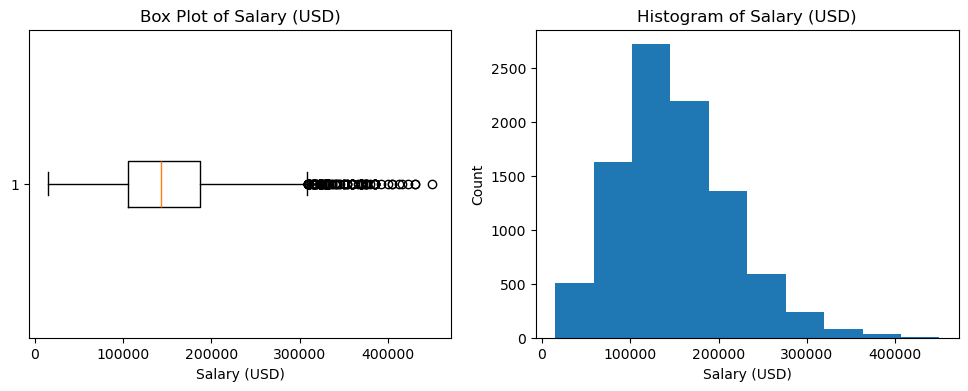

In [61]:
# Use a subplot to show both figures side by side for easy comparison.
sal_fig, x = plt.subplots(1,2, figsize = (12,4)) 

x[0].set_title("Box Plot of Salary (USD)")
x[0].set_xlabel("Salary (USD)")
x[0].boxplot(dat['salary_in_usd'], vert = False)

x[1].set_title("Histogram of Salary (USD)") 
x[1].set_xlabel("Salary (USD)") 
x[1].set_ylabel("Count")
x[1].hist(dat['salary_in_usd'])

The box plot indicates several potential outliers in the data (indicated by the circles on the right hand tail of the plot). This is also indicated on the histogram by the presence of a tail, indicating an overall right-skewed distribution. 

Both of these observations indicate that there are extreme values of salary on the higher end i.e. that there are a small subset of individuals who make substantially more than the median income for this field. Investigating this is an avenue for further investigation.